
# project : Medical Appointments in Brazil  Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#investigation">Investigation</a></li>
<li><a href="#conclusions">Conclusions</a></li>

</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

-ScheduledDay : tells us on what day the patient set up their appointment.

-Neighborhood : indicates the location of the hospital.

-Scholarship : indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
#### Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

# Gathering Data

I have a flat file (csv) which contains data I will analyze it.

# Questions :


What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?



In [20]:
# Use this cell to setup import statements for all of the packages that I plan to use.

import pandas as pd
import numpy as np 
import matplotlib.pyplot as  plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

 In this section of the report, you will load the data, check for cleanliness, trim and clean your dataset for analysis. 

### General Properties


In [21]:
# Loading data and printing out a few lines.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')             
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
df.shape

(110527, 14)

data content from 110527 rows and 14 columns

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data has no missing data  but the column Hipertension has  wrong spelling  it's Hypertension I will change it

In [24]:
sum(df.duplicated())

0

There are no duplicate rows

In [25]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

There are only 62299 patients unique then there are duplicate patient ids

In [26]:
sum(df['PatientId'].duplicated())

48228

There are 48228 duplicate ID

In [27]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The mean age is 37 , the maxmium age 115 and the minmum age -1 which is a mistake we will remove it . there are 25% of the patiant have got the SMS

In [28]:
print(df.query('Age < 0'))

          PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No  


There is only one patient has age under zero which is a mistake it won't effect on result but I will remove it


### Data Cleaning
 

In [29]:
# removing the age value with mistake data
df.drop(index=99832, inplace=True)

In [30]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


This is more reliable

In [31]:
# correction for wrong spelling  
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)

In [32]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [33]:
# removing duplicate patient ids with the same status
df.drop_duplicates(['PatientId','No-show'],inplace=True)

In [34]:
df.shape

(71816, 14)

<a id='eda'></a>
## Exploratory Data Analysis

 Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section.. 




## General look

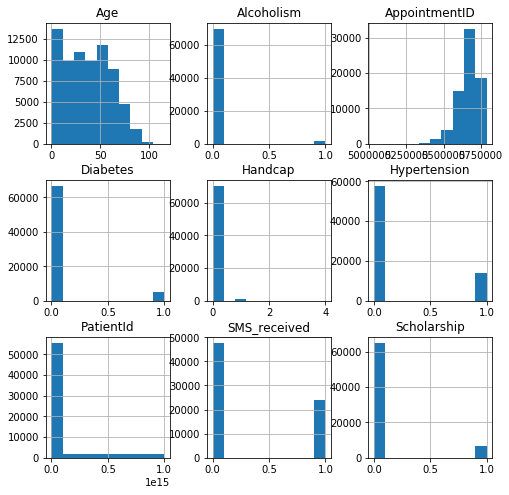

In [35]:
df.hist(figsize=(8,8));

-The number of patients who receive an SMS is half those who didn't.

-Most of the patients didn't suffer from alcoholism, diabetes but few suffer from hypertension.

In [36]:
#divding patients into two groups to explore them
show = df['No-show'] == 'No'
no_show = df['No-show'] == 'Yes'

In [37]:
show.sum(),no_show.sum()


(54153, 17663)

In [38]:
df[show].mean().astype('str')

PatientId        1.46819439838e+14
AppointmentID        5672493.54614
Age                  37.2291655125
Scholarship        0.0913338134545
Hypertension        0.202943511901
Diabetes           0.0728676158292
Alcoholism         0.0235998005651
Handcap            0.0209037357118
SMS_received        0.297231916976
dtype: object

In [39]:
df[no_show].mean().astype('str')

PatientId        1.46028502659e+14
AppointmentID        5648097.71987
Age                  34.3762667723
Scholarship         0.108418728415
Hypertension        0.170922266886
Diabetes           0.0651078525732
Alcoholism         0.0294400724679
Handcap            0.0177772745287
SMS_received        0.453094038385
dtype: object

,Age
count,71816.000000
mean,36.527501
std,23.378262
min,0.000000
25%,17.000000
50%,36.000000
75%,55.000000
max,115.000000


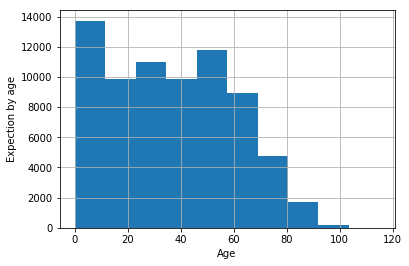

In [40]:
ax = df['Age'].hist()
ax.set_ylabel('Attendance')
ax.set_xlabel('Age')
ax.set_ylabel('Expection by age')
pd.DataFrame(df['Age'].describe())



Mean age for shown patients was 37 and no-showed is 34. showed patient received messages less than no showed so we have to check the SMS campaign

<a id='investigation'></a>
# Investigation the factors on the attendance rate

### Does age affect the number of shown patients?

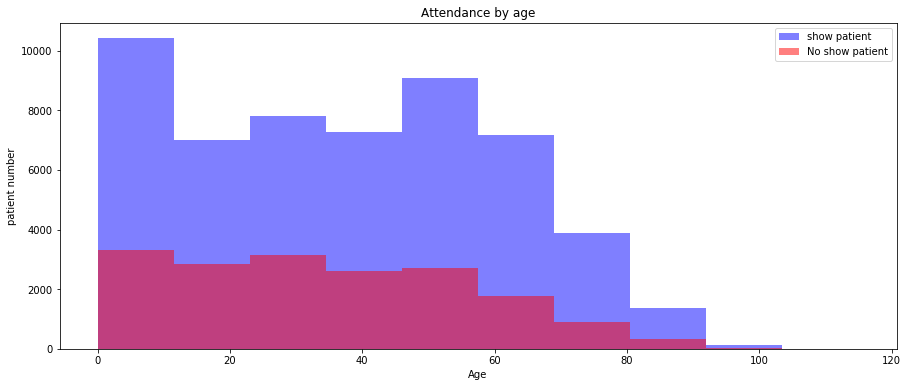

In [41]:
plt.figure(figsize=(15,6))
plt.hist(df.Age[show], alpha=0.5, color='blue', label='show patient')
plt.hist(df.Age[no_show], alpha=0.5 ,color='red', label='No show patient')
plt.legend();
plt.title('Attendance by age')
plt.xlabel('Age')
plt.ylabel('patient number');



Patients from (0:10) years have more shows. Their parents care for their child than from (50:58) have good attendance at least patient above 65.

# Does age, hypertension, and diabetes affect attendance?

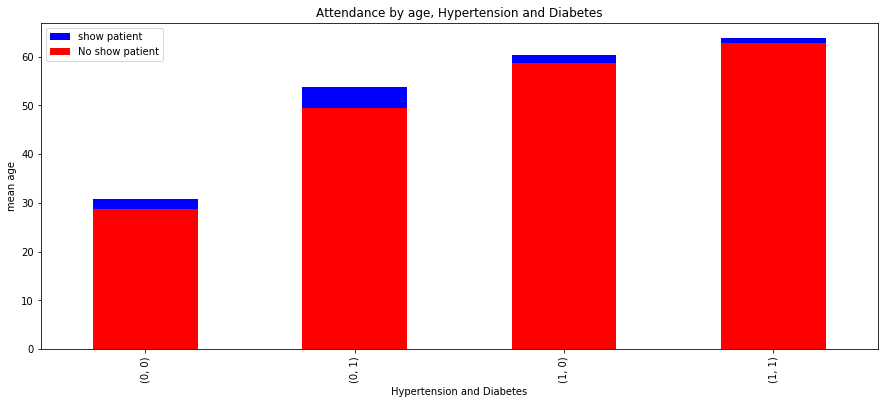

In [42]:
plt.figure(figsize=(15,6))
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='blue',label='show patient')
df[no_show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='red', label='No show patient')
plt.legend();
plt.title('Attendance by age, Hypertension and Diabetes')
plt.xlabel('Hypertension and Diabetes')
plt.ylabel('mean age');

Patients have no hypertension and diabetes with a mean age of 30 most of them no show and few attend appointments, patients have diabetes with a mean age of 55 also most of them no show and few attend the appointment, patients has Hypertension with a mean age of 60 most of them no show and few attend to the appointment, others have both hypertension and diabetes with mean age 63 most of them no show and few attend to the appointment so there is no relation between hypertension and diabetes and attendance.

### Does receiving SMS affect attendance?

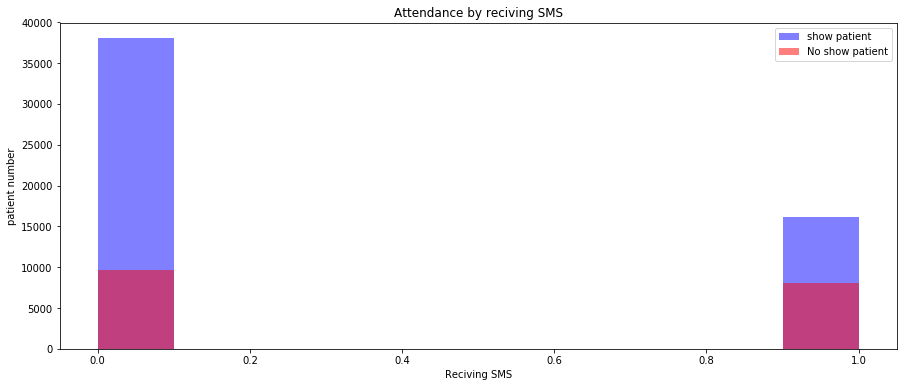

In [43]:
plt.figure(figsize=(15,6))
plt.hist(df.SMS_received[show], alpha=0.5, color='blue', label='show patient')
plt.hist(df.SMS_received[no_show], alpha=0.5 ,color='red', label='No show patient')
plt.legend();
plt.title('Attendance by reciving SMS')
plt.xlabel('Reciving SMS')
plt.ylabel('patient number');


Number of patients that showed received SMS less than the patients that not shown which means we have to check our SMS campaign

### Does the location affect the attendance?

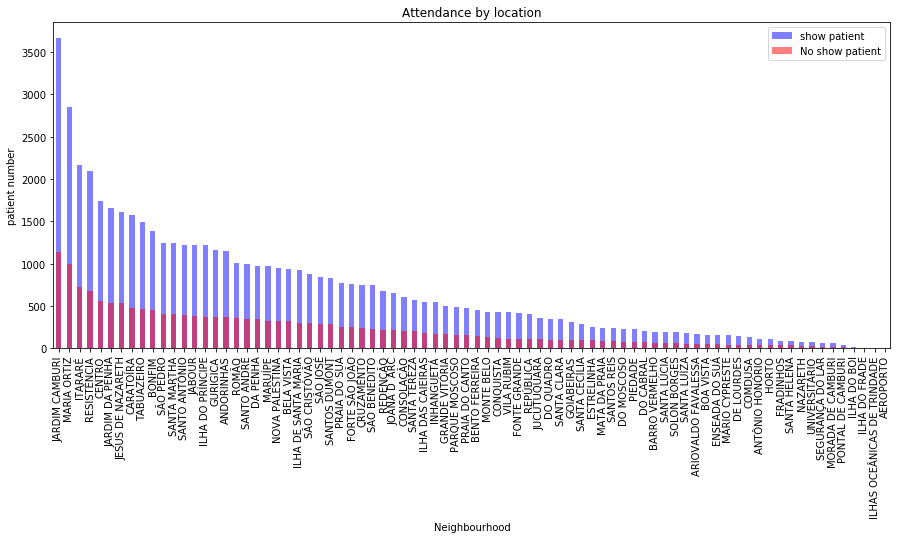

In [44]:
plt.figure(figsize=(15,6))
show_counts = df.Neighbourhood[show].value_counts() 
show_counts.plot(kind='bar', alpha=0.5, color='blue', label='show patient')
noshow_counts = df.Neighbourhood[no_show].value_counts()
noshow_counts.plot(kind='bar', alpha=0.5 ,color='red', label='No show patient')
plt.legend();
plt.title('Attendance by location')
plt.xlabel('Neighbourhood')
plt.ylabel('patient number');


The neighborhood has a great effect on attendance, Jardim Camburi has the biggest number of patients and attendance unlike Aeroporto has the smallest number of patients and attendance

### Does the gender affect the attendance ?

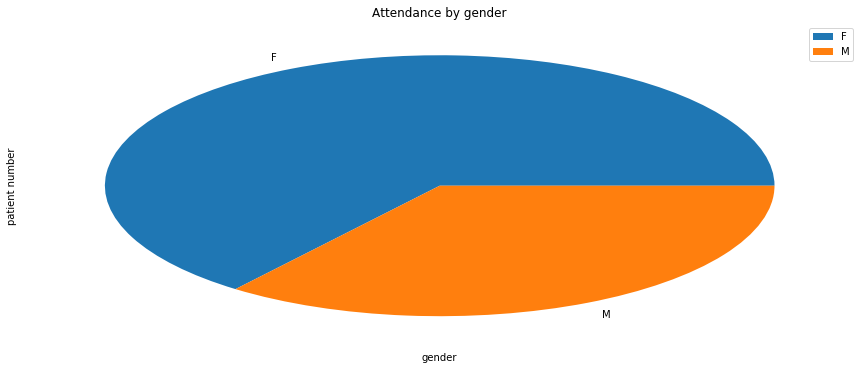

In [45]:
def attendance(df, colmn, attended):
    plt.figure(figsize=(15,6))
    df[colmn][attended].value_counts(normalize=True).plot(kind='pie', label='show patient')
    plt.legend();
    plt.title('Attendance by gender')
    plt.xlabel('gender')
    plt.ylabel('patient number');
attendance(df, 'Gender', show)

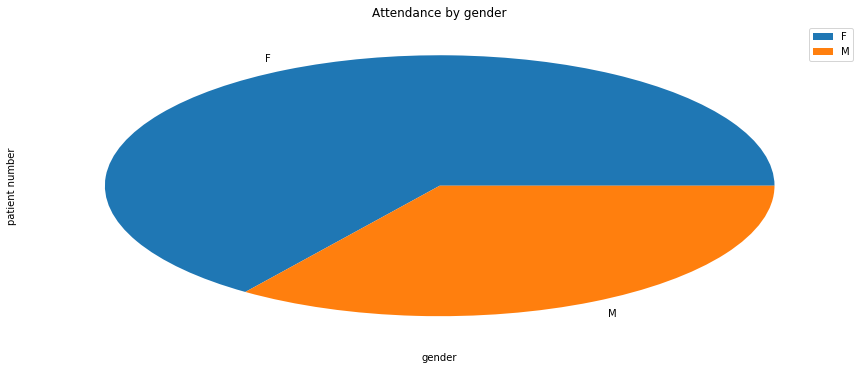

In [46]:
attendance(df, 'Gender', no_show)

The two pie charts are almost the same so gender has no effect on attendance

### Does the Scholarship affect the attendence ?

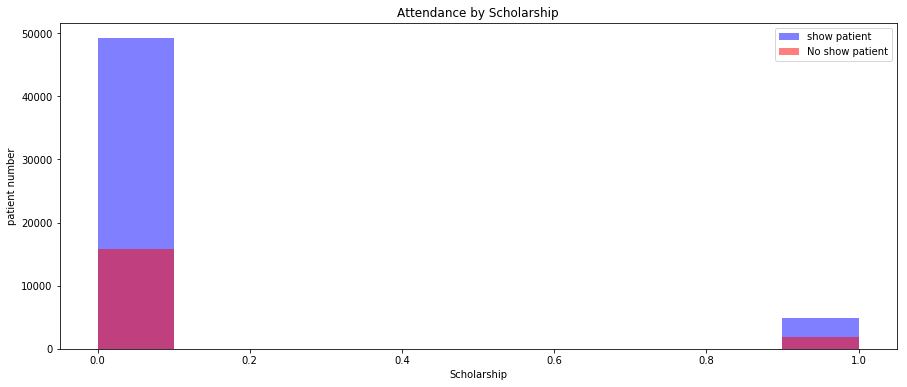

In [47]:
plt.figure(figsize=(15,6))
plt.hist(df.Scholarship[show], alpha=0.5, color='blue', label='show patient')
plt.hist(df.Scholarship[no_show], alpha=0.5 ,color='red', label='No show patient')
plt.legend();
plt.title('Attendance by Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('patient number');

The number of patients that have Scholarship is more than patients that haven't scholarship so Scholarship has a great effect on the attendance

<a id='conclusions'></a>
## Conclusions

- Neighborhood and Scholarships have a great effect on attendance of medical appointments.

- The SMS campaign needs to be checked, as the number of patients that showed received SMS is less than the number of patients that no-showed.

- Age, gender, hypertension, and diabetes have no effect on attending the appointment. 


# Limitations
-Couldn't detect relation between patient showing or no showing and gender, hypertension, and diabetes

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0